Welcome to the comprehensive analysis of an asthma dataset. 

**Introduction**  
This report presents a comprehensive analysis of the Asthma Disease Dataset, which includes extensive health information for 2,392 patients diagnosed with Asthma.In this notebook, we will explore the dataset, perform feature engineering, and implement the RandomForest machine learning model to predict asthma-related outcomes.  The dataset encompasses demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and diagnosis information. The goal is to explore factors associated with asthma, develop predictive models, and conduct statistical analyse to aid in its diagnosis and management.  . 

Data Exploration and Clean  


ng
The initial phase of the analysis involved loading and inspecting the dataset to understand its structure and contents. Key steps inclu  ded:

Data Inspection: Examined the first few rows and the summary of the dataset to understand the variables and their.  types.
Missing Values Check: Ensured that there were no missing values in the dataset, confirming its completeness for analysis.




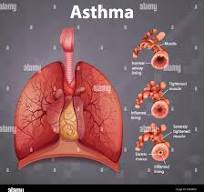


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
asthma = pd.read_csv("asthma_disease_data.csv")

In [3]:
#Viewing the first 5 dataset
asthma.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
#Cheking the shape of the dataset
asthma.shape

(2392, 29)

In [5]:
#Summary Statistics
asthma.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


In [6]:
# Informat5ion on t5he dataset
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [7]:
numerical_summary = asthma.describe()
numerical_summary

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Checking for missing values
asthma.isnull()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
asthma.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [10]:
#Checking for duplicates
asthma[asthma.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


In [11]:
asthma.duplicated().sum()

0

In [12]:
asthma = pd.DataFrame(asthma)
asthma

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [13]:
age_diagnosed = asthma[asthma["Diagnosis"]==1]["Age"]
age_not_diagnosed = asthma[asthma["Diagnosis"]==0]["Age"]
print("Ages of diagnosed patients :")
print(age_diagnosed.values)

print("\nAges of not diagnosed patients :")
print(age_not_diagnosed.values)

Ages of diagnosed patients :
[31 45 69 49 60  5 49 32 21 48 77 42 79 61 20 58 47 70 77 32  9 26 30 67
 13 24 40 16 12 12  5  5 23 40 22 63 36 67 23 58  7 51 43 25 14 31 35 56
 49 45 62  7 41 72 63 65  7 39 18 39 16 61  6 69 17 41 39 38 36 74 19 61
 16 73  6 15 56 12 63 45 74 78 60 55 68 16 41 76 28 53 23 18 78 67 65 35
 13 25 20 37 36  5 24 78 77 26 54 58 56 35 68 27 12 70 77 25  5  9 74 65
 31 43 18 54]

Ages of not diagnosed patients :
[63 26 57 ...  5 46 26]


In [14]:
age_diagnosed = asthma[asthma["Diagnosis"] == 1]['Age']


max_age_diagnosed = age_diagnosed.max()
max_age_count_diagnosed = age_diagnosed[age_diagnosed == max_age_diagnosed].count()


print("Maximum age of diagnosed patients:", max_age_diagnosed)
print("Count of patients with maximum age:", max_age_count_diagnosed)

Maximum age of diagnosed patients: 79
Count of patients with maximum age: 1


In [15]:
#Descriptive Statisticcs
age_diagnosed =asthma[asthma['Diagnosis'] == 1]['Age']
age_not_diagnosed =asthma[asthma['Diagnosis'] == 0]['Age']


mean_age_diagnosed = age_diagnosed.mean()
std_age_diagnosed = age_diagnosed.std()
mean_age_not_diagnosed = age_not_diagnosed.mean()
std_age_not_diagnosed = age_not_diagnosed.std()


print("Descriptive Statistics:")
print(f"Mean age (diagnosed): {mean_age_diagnosed:.2f} ± {std_age_diagnosed:.2f}")
print(f"Mean age (not diagnosed): {mean_age_not_diagnosed:.2f} ± {std_age_not_diagnosed:.2f}")

Descriptive Statistics:
Mean age (diagnosed): 40.74 ± 22.75
Mean age (not diagnosed): 42.21 ± 21.55


**Data Visualization**  
Data visualization was used to gain insights into the distribution and relationships between variables:  

* **Age Distribution**: A histogram showed that the age of patients ranged from 5 to 80 years, with a diverse age distribution across the dataset.  
* **BMI Distribution**: Another histogram indicated that BMI values ranged from 15 to 40, highlighting the prevalence of different weight categories among the patients.  
* **Diagnosis Count**: A count plot illustrated the distribution of diagnosis statuses, showing the proportion of patients diagnosed with asthma versus those not diagnosed.

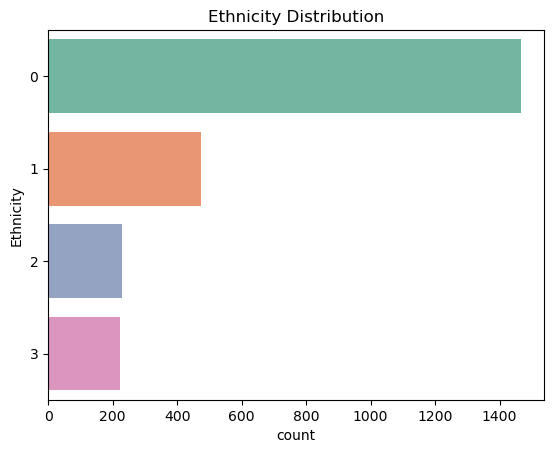

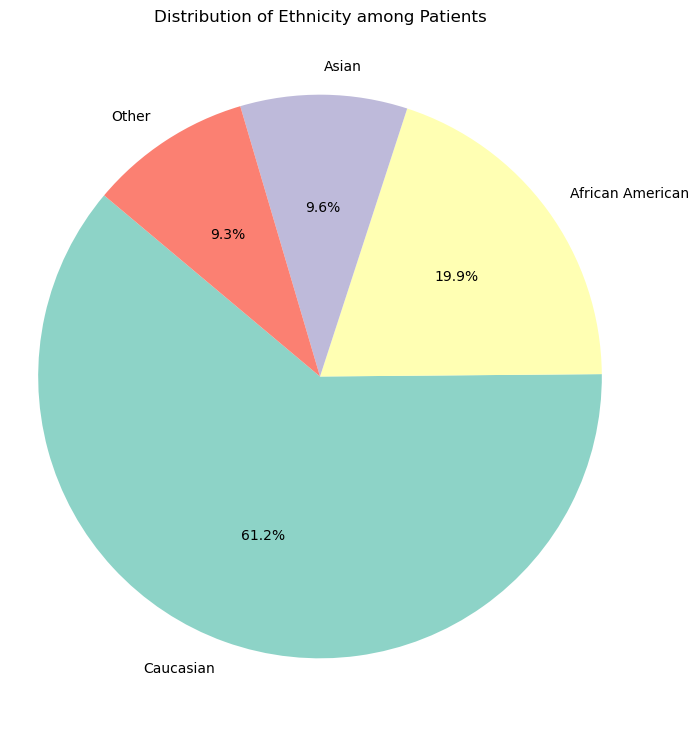

In [16]:
#Distribution of ethnicity among patients
ethnicity_counts = asthma['Ethnicity'].value_counts()

ethnicity_labels = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

ethnicity_counts.index = ethnicity_counts.index.map(ethnicity_labels)

sns.countplot(y='Ethnicity', data=asthma, palette='Set2', order=asthma['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution')

# Plotting a pie chart
plt.figure(figsize=(8, 9))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Ethnicity among Patients')
plt.axis('equal') 
plt.show()

In [17]:
#Checking the frequency and percentage of each ethnicity by diagnosis status 
ethnicity_diagnosis_counts = pd.crosstab(asthma['Ethnicity'], asthma['Diagnosis'])
ethnicity_diagnosis_percentage = ethnicity_diagnosis_counts.apply(lambda r: r/r.sum()*100, axis=1)

print("\n0: Caucasian,\n1: African American,\n2: Asian,\n3: Other")

print("\nFrequency of each ethnicity by diagnosis status:")
print(ethnicity_diagnosis_counts)

print("\nPercentage of each ethnicity by diagnosis status:")
print(ethnicity_diagnosis_percentage)


0: Caucasian,
1: African American,
2: Asian,
3: Other

Frequency of each ethnicity by diagnosis status:
Diagnosis     0   1
Ethnicity          
0          1392  73
1           450  25
2           218  11
3           208  15

Percentage of each ethnicity by diagnosis status:
Diagnosis          0         1
Ethnicity                     
0          95.017065  4.982935
1          94.736842  5.263158
2          95.196507  4.803493
3          93.273543  6.726457


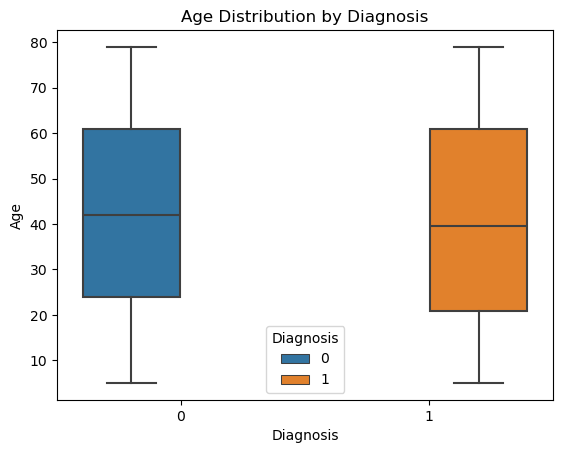

In [18]:
# Box plot for age by diagnosis
sns.boxplot(x='Diagnosis', y='Age', data=asthma,hue='Diagnosis')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

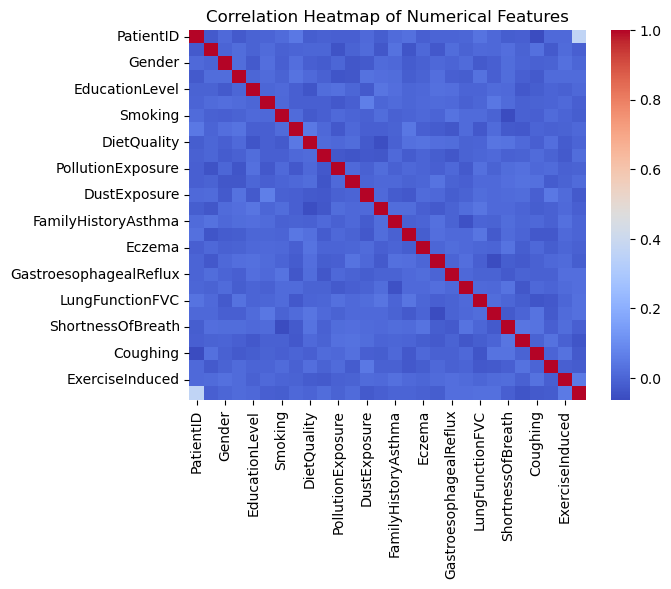

In [19]:
# Correlation heatmap
numerical_features = asthma.select_dtypes(exclude='object').columns
sns.heatmap(asthma[numerical_features].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

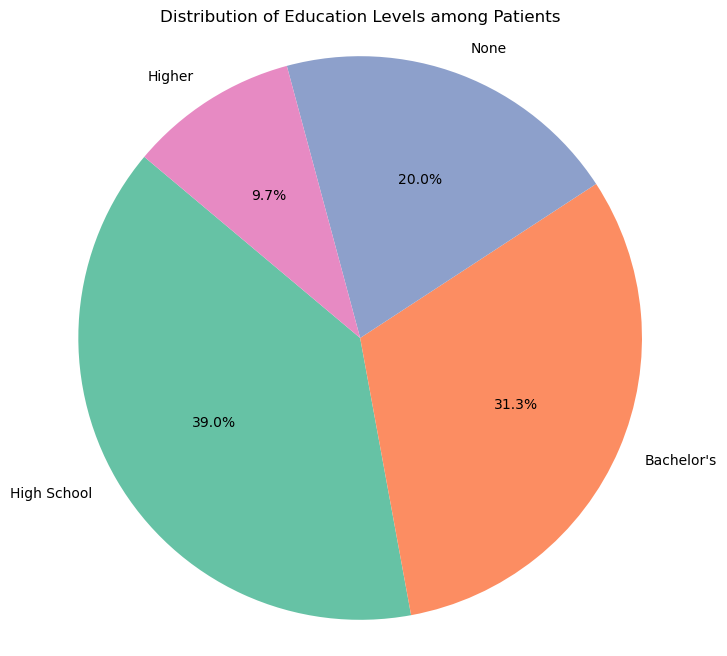

In [20]:
# Distribution of education levels among patients
education_counts = asthma['EducationLevel'].value_counts()


education_labels = {
    0: 'None',
    1: 'High School',
    2: "Bachelor's",
    3: 'Higher'
}


education_counts.index = education_counts.index.map(education_labels)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Distribution of Education Levels among Patients')
plt.axis('equal')  
plt.show()

In [21]:
#Checking the frequency and percentage of each education levels by diagnosis status
EducationLevel_diagnosis_counts = pd.crosstab(asthma['EducationLevel'], asthma['Diagnosis'])
EducationLevel_diagnosis_percentage = EducationLevel_diagnosis_counts.apply(lambda r: r/r.sum()*100, axis=1)

print("\n0: None,\n1: High School,\n2: Bachelor's,\n3: Higher")

print("\nFrequency of each EducationLevel by diagnosis status:")
print(EducationLevel_diagnosis_counts)

print("\nPercentage of each EducationLevel by diagnosis status:")
print(EducationLevel_diagnosis_percentage)


0: None,
1: High School,
2: Bachelor's,
3: Higher

Frequency of each EducationLevel by diagnosis status:
Diagnosis         0   1
EducationLevel         
0               453  25
1               882  51
2               720  29
3               213  19

Percentage of each EducationLevel by diagnosis status:
Diagnosis               0         1
EducationLevel                     
0               94.769874  5.230126
1               94.533762  5.466238
2               96.128171  3.871829
3               91.810345  8.189655


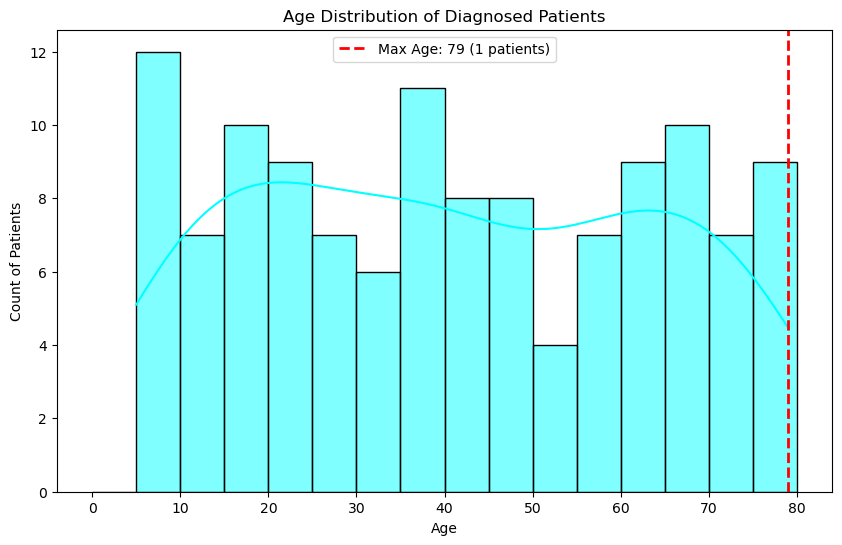

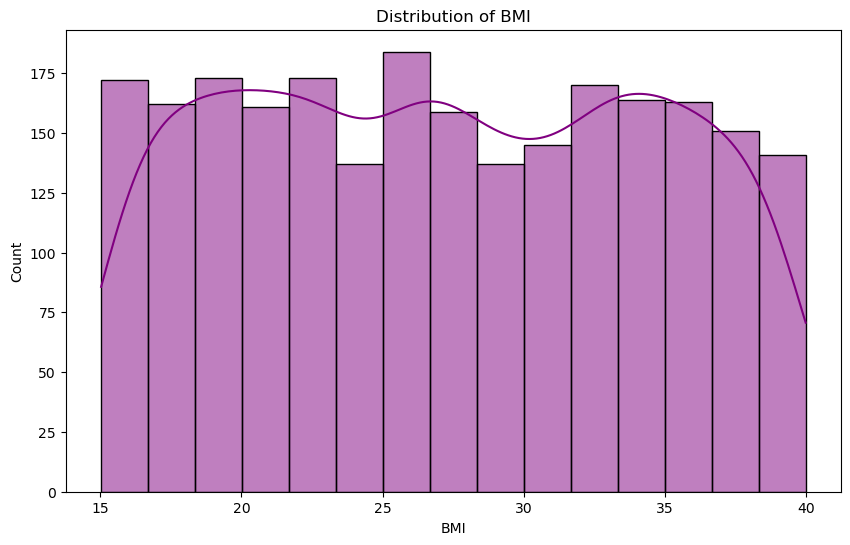

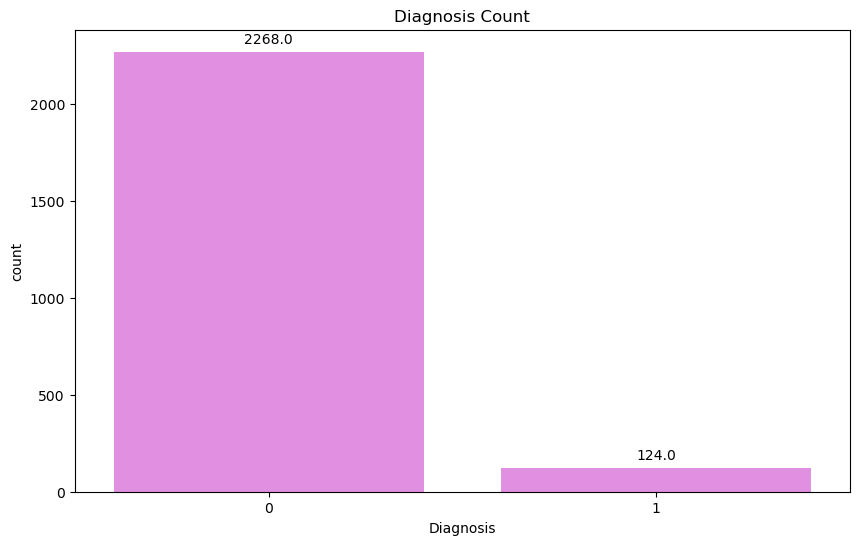

In [22]:
#Age distribution diagnosed patients
plt.figure(figsize=(10, 6))
sns.histplot(age_diagnosed, bins=range(0, 85, 5), kde=True, color='cyan')
plt.axvline(max_age_diagnosed, color='red', linestyle='--', linewidth=2, label=f'Max Age: {max_age_diagnosed} ({max_age_count_diagnosed} patients)')
plt.title('Age Distribution of Diagnosed Patients')
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.legend()
plt.grid(False)

# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(asthma['BMI'], bins=15, kde=True, color='purple')
plt.title('Distribution of BMI')
plt.show()

# Countplot for Diagnosis
plt.figure(figsize=(10, 6))
xz = sns.countplot(x='Diagnosis', data=asthma, color= 'violet')
plt.title('Diagnosis Count')
for i in xz.patches:
    xz.annotate(format(i.get_height(), '.1f'),
                      (i.get_x() + i.get_width()/2., i.get_height()),
                      ha= 'center', va ='center',
                      xytext= (0,9),
                     textcoords ='offset points')
plt.show()


<Figure size 1000x600 with 0 Axes>

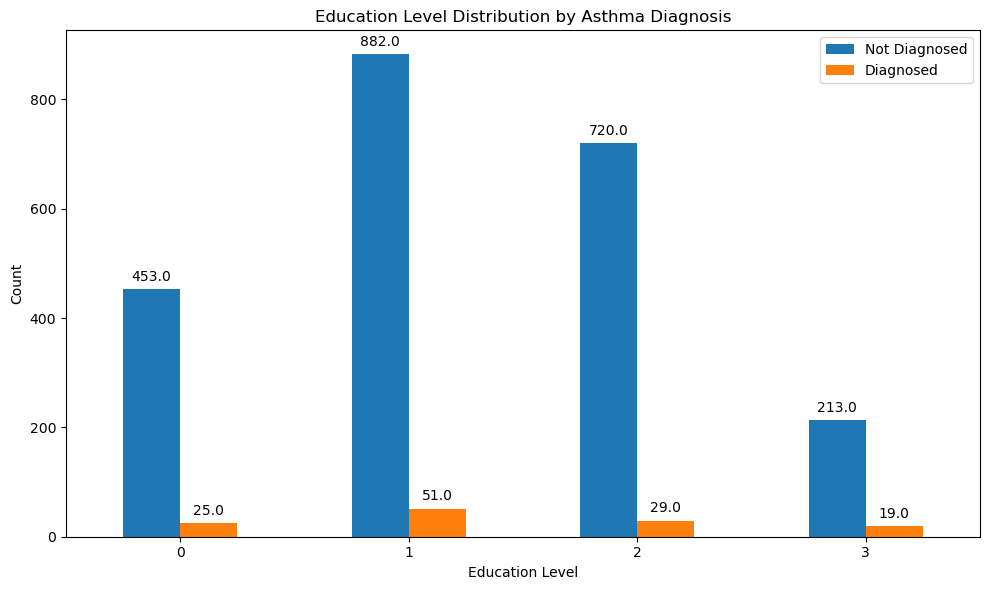

In [23]:
#Education Level Distribution by Asthma Diagnosis
plt.figure(figsize=(10, 6))

phi = EducationLevel_diagnosis_counts.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Education Level Distribution by Asthma Diagnosis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Diagnosed', 'Diagnosed'])

plt.tight_layout()
for i in phi.patches:
    phi.annotate(format(i.get_height(), '.1f'),
                      (i.get_x() + i.get_width()/2., i.get_height()),
                      ha= 'center', va ='center',
                      xytext= (0,9),
                     textcoords ='offset points')
plt.show()

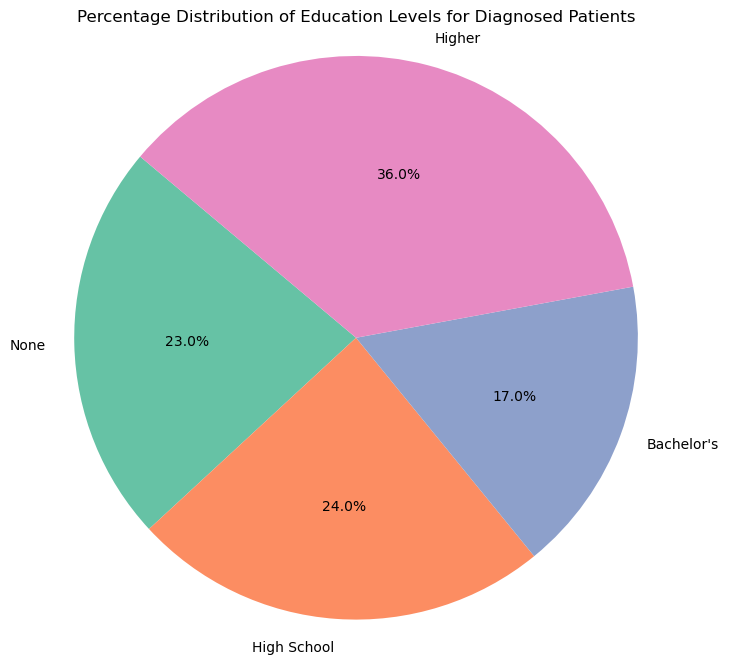

In [24]:
#Percentage Distribution of Education Levels for Diagnosed Patients
plt.figure(figsize=(8, 8))

# Specific labels for education levels
labels = ['None', 'High School', "Bachelor's", 'Higher']
sizes = EducationLevel_diagnosis_percentage.loc[:, 1]  # Percentage for 'Diagnosed' category

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Percentage Distribution of Education Levels for Diagnosed Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Text(0, 0.5, 'FEV1')

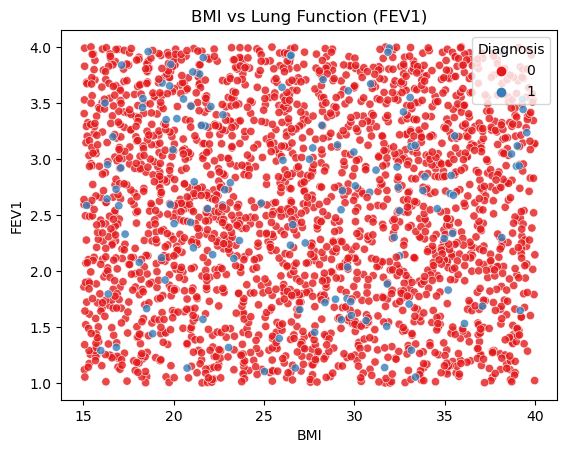

In [25]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=asthma, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

Text(0.5, 1.0, 'Age vs Smoking Status')

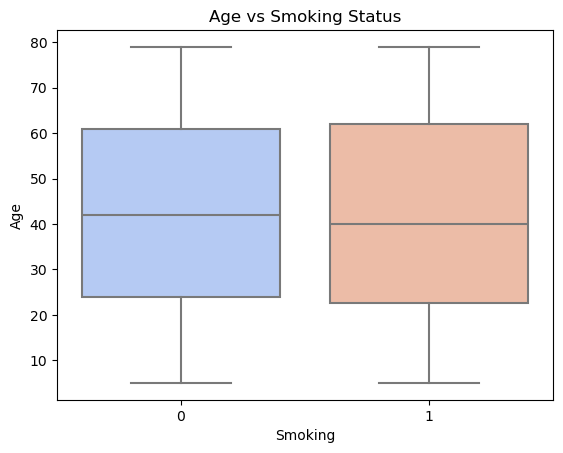

In [26]:
sns.boxplot(x='Smoking', y='Age', data=asthma, palette='coolwarm')
plt.title('Age vs Smoking Status')

Text(0.5, 1.0, 'Education Level Distribution')

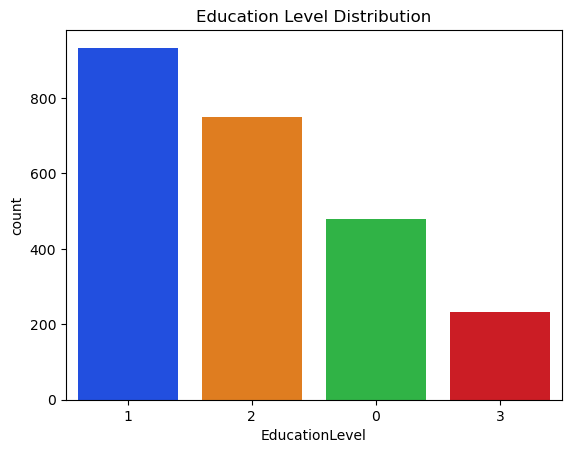

In [27]:
sns.countplot(x='EducationLevel', data=asthma, palette='bright', order=asthma['EducationLevel'].value_counts().index)
plt.title('Education Level Distribution')

Text(0.5, 1.0, 'Family History of Asthma')

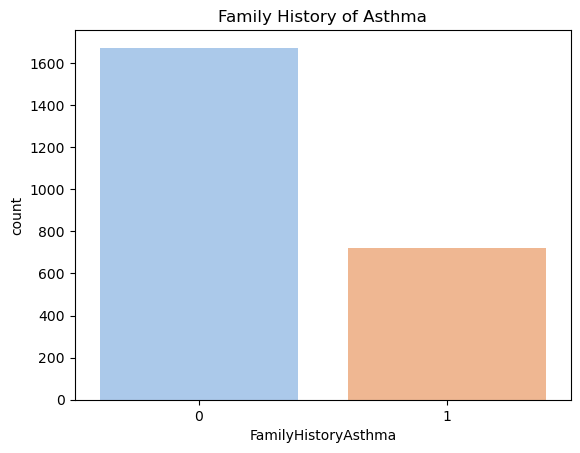

In [28]:
sns.countplot(x='FamilyHistoryAsthma', data=asthma, palette='pastel')
plt.title('Family History of Asthma')

Text(0, 0.5, 'Physical Activity')

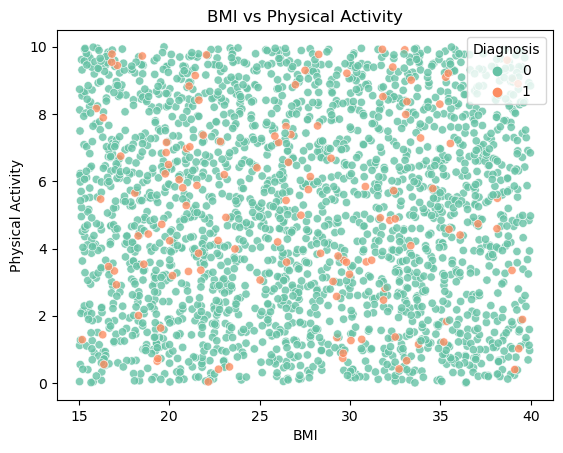

In [29]:
sns.scatterplot(x='BMI', y='PhysicalActivity', data=asthma, hue='Diagnosis', palette='Set2', alpha=0.8)
plt.title('BMI vs Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Physical Activity')

Text(0.5, 1.0, 'Distribution of Lung Function (FVC)')

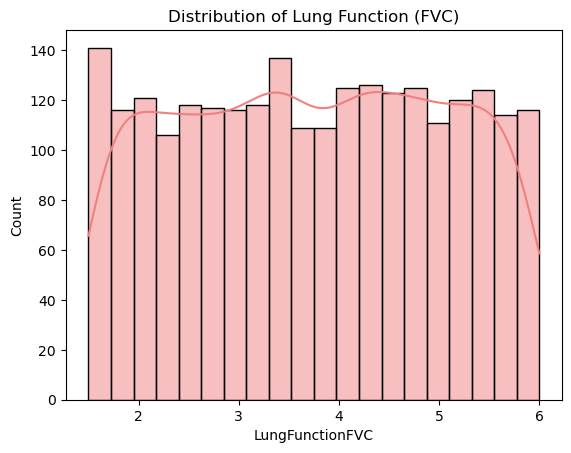

In [30]:
sns.histplot(asthma['LungFunctionFVC'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Lung Function (FVC)')

**Feature Engineering**  
Feature engineering involved creating new variables and modifying existing ones to improve model performance  :**

Age and BMI Categorizat **ion: Age was categorized into groups (e.g., Child, Teen, Adult) and BMI was categorized into weight categories (e.g., Underweight, Normal, Overweight, Obes    e
**).
Dummy Varia**bles: Categorical variables were converted into dummy variables to facilitate their use in machine learning models. This included variables such as gender, ethnicity, education level, smoking status, and various health conditions and symptoms.

In [31]:
# Categorize Age
asthma['AgeGroup'] = pd.cut(asthma['Age'], bins=[0, 12, 18, 35, 50, 65, 80], labels=False)
asthma['AgeGroup']



0       4
1       2
2       4
3       3
4       4
       ..
2387    3
2388    1
2389    4
2390    3
2391    2
Name: AgeGroup, Length: 2392, dtype: int64

In [32]:
# Categorize Age
asthma['AgeGroup'] = pd.cut(asthma['Age'], bins=[0, 12, 18, 35, 50, 65, 80], labels= False)

AgeGroup_labels = {
    0: 'Child',
    1: 'Teen',
    2: 'YoungAdult',
    3: 'Adult',
    4: 'MiddleAged',
    5: 'Senior'
}
print(AgeGroup_labels)

# Categorize BMI
asthma['BMICategory'] = pd.cut(asthma['BMI'], bins=[0, 18.5, 24.9, 29.9, 40], labels= False)
                               
BMI_labels = {
    0: 'Underweight',
    1: 'Normal',
    2: 'Overweight',
    3: 'Obese',
}
print(BMI_labels)

# Convert categorical features to dummy variables
v = pd.get_dummies(asthma, columns=['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'AgeGroup', 'BMICategory'], drop_first=True)

# Drop irrelevant columns
asthma.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

{0: 'Child', 1: 'Teen', 2: 'YoungAdult', 3: 'Adult', 4: 'MiddleAged', 5: 'Senior'}
{0: 'Underweight', 1: 'Normal', 2: 'Overweight', 3: 'Obese'}


**Model Building and Evaluation**  
The final phase involved building and evaluating a predictive model to diagnose asthma:  

**Data Splitting**: The dataset was split into training and testing sets to enable model training and evaluation.   
**Model Selection**: A Random Forest classifier was chosen for its robustness and ability to handle a large number of features.  
**Model Training**: The model was trained on the training set and used to make predictions on the test set.  
**Model Evaluation**: The model's performance was evaluated using metrics such as confusion matrix, classification report, and accuracy score. The results provided insights into the model's accuracy and its ability to correctly classify patients with and without asthma.

In [34]:
#Supervised Learning
# Define features and target
X = asthma.drop(columns=['Diagnosis'])
y = asthma['Diagnosis']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
print (y_pred)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[456   0]
 [ 23   0]]
     

Accuracy: 95.19% Classification Report: The Random Forest model achieved an accuracy of 95.19%. It excelled in predicting class 0 but struggled with class 1, showing very low metrics for precision, recall, and F1-score for this class.